<a href="https://colab.research.google.com/github/Eduard25/Galaxias/blob/main/PruebaDataset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!python -m venv myenv
!source myenv/bin/activate

In [5]:
!apt install python3.10-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-pip-whl python3-setuptools-whl
The following NEW packages will be installed:
  python3-pip-whl python3-setuptools-whl python3.10-venv
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,473 kB of archives.
After this operation, 2,884 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip-whl all 22.0.2+dfsg-1ubuntu0.4 [1,680 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-setuptools-whl all 59.6.0-1.2ubuntu0.22.04.1 [788 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3.10-venv amd64 3.10.12-1~22.04.3 [5,716 B]
Fetched 2,473 kB in 2s (1,135 kB/s)
Selecting previously unselected package python3-pip-whl.
(Reading database ... 121918 files and directories currently installed.)
Pr

In [7]:
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
ERROR: pip's dependency resolver doe

In [1]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version (from TensorFlow):", keras.__version__)


TensorFlow version: 2.16.1
Keras version (from TensorFlow): 3.3.3


In [2]:
%pip install astroNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 534.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 58.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd

[Errno 2] No such file or directory: 'root'
/root


In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [8]:
from keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import load_galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

In [9]:
#Descargamos la Database que se encuentra de manera digital
images, labels = load_galaxy10sdss()

#Convertimos a las 10 clases que queremos clasificar nuestras galaxias
labels = utils.to_categorical(labels, 10)


Galaxy10.h5:  99%|█████████▉| 208M/210M [00:12<00:00, 19.9MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:13, 15.7MB/s]                           


In [10]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)


2.16.1
3.3.3


===================Data Inspection===================


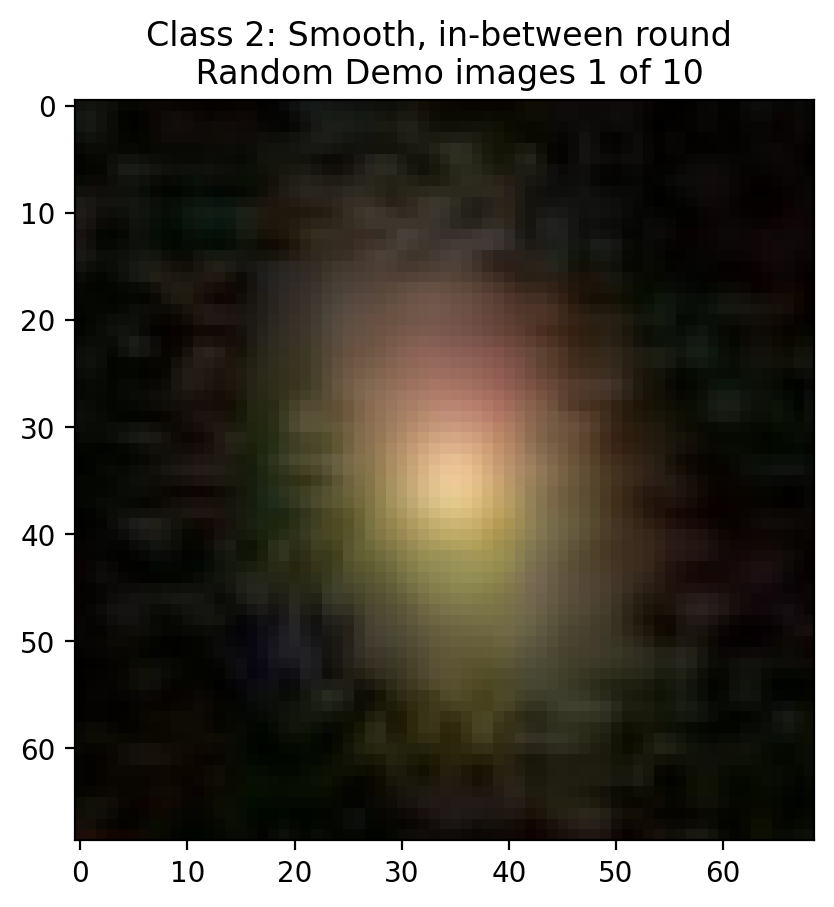

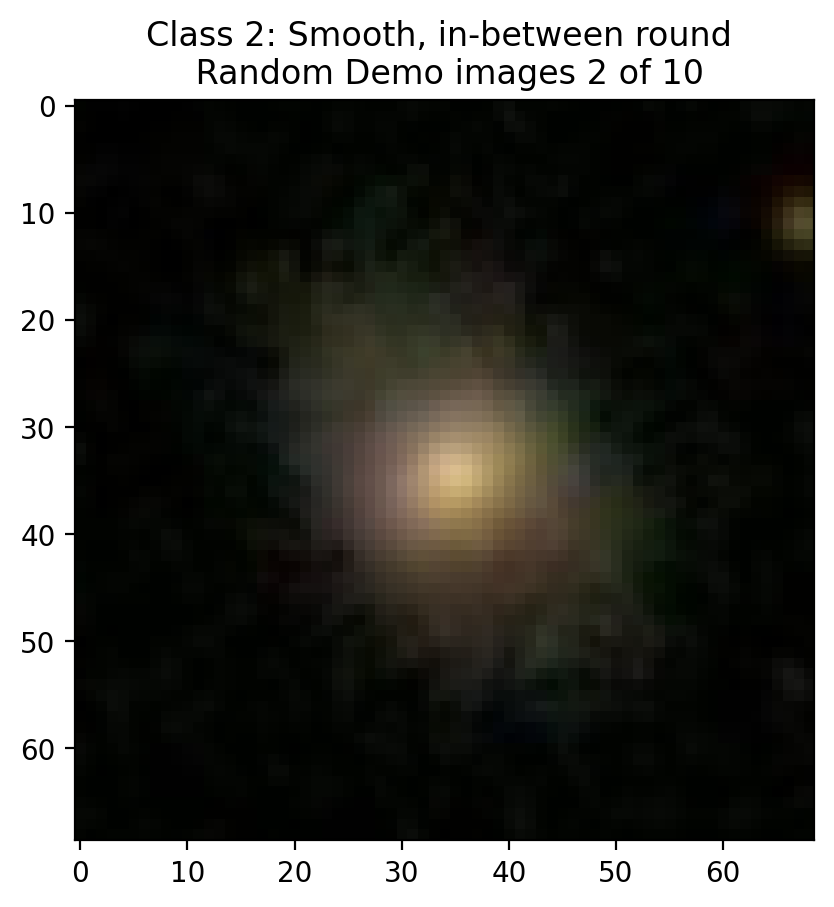

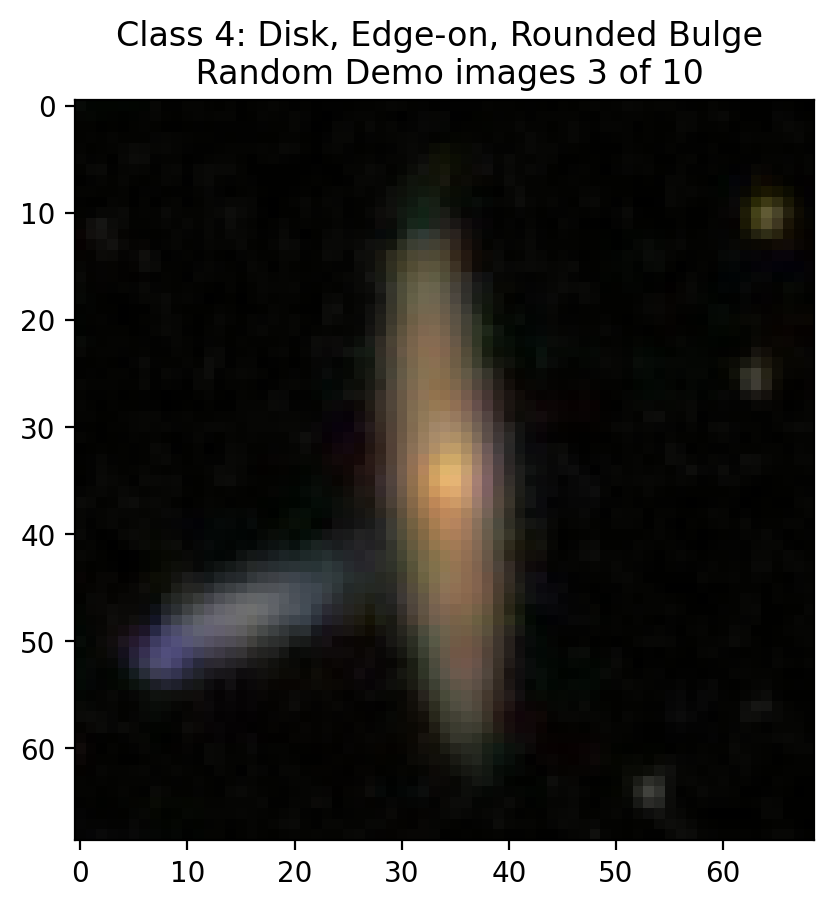

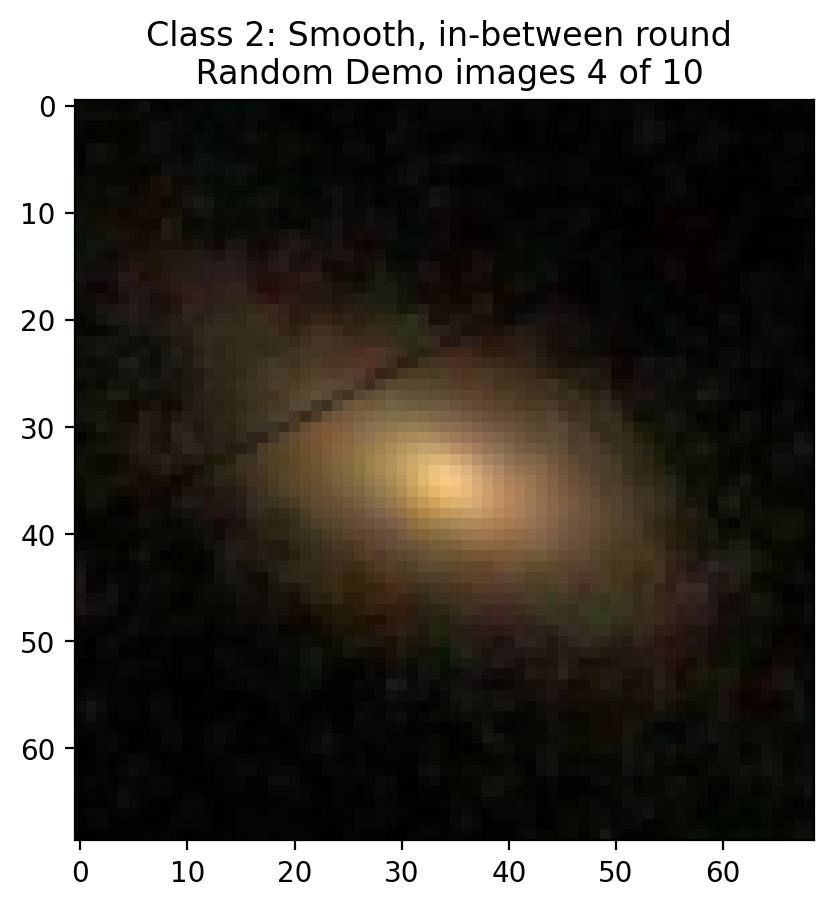

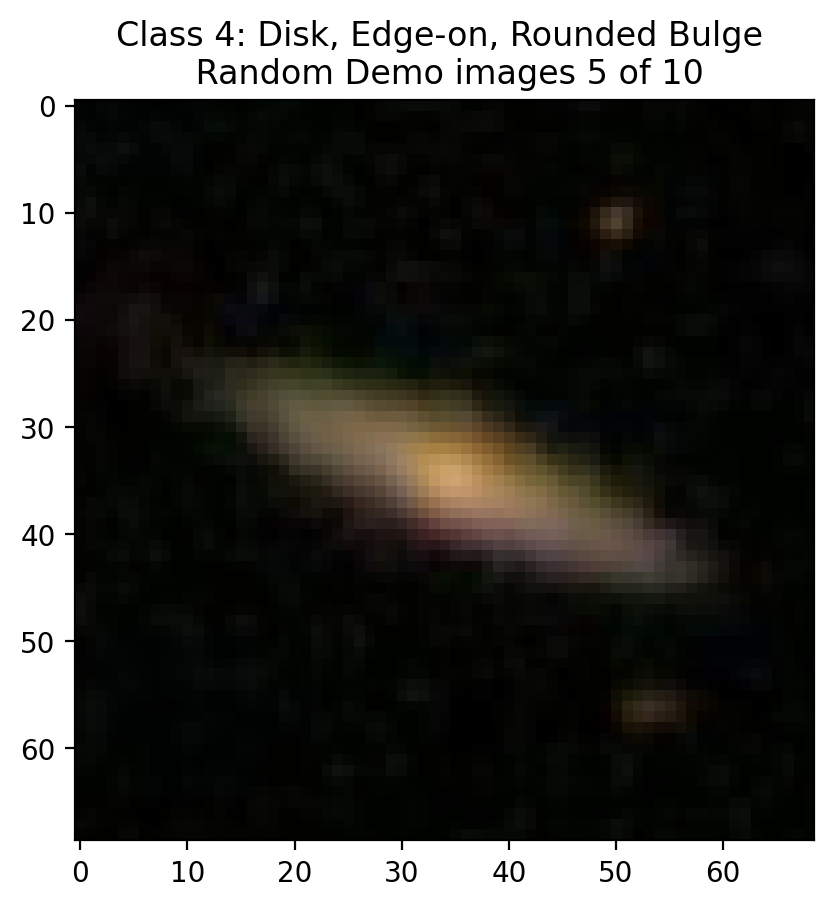

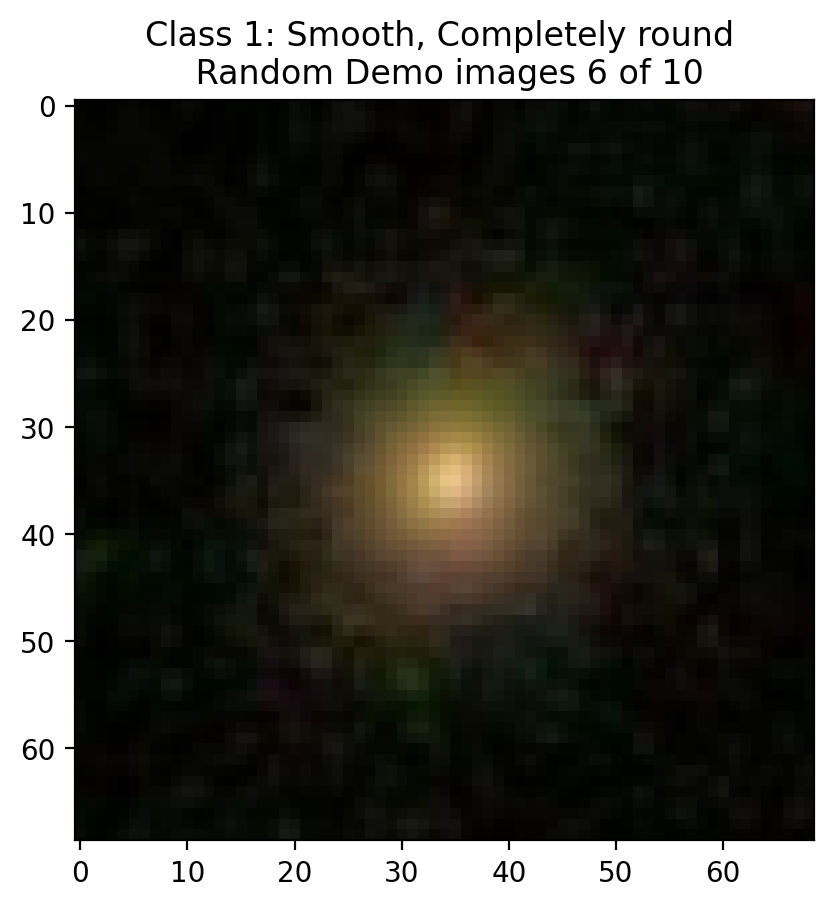

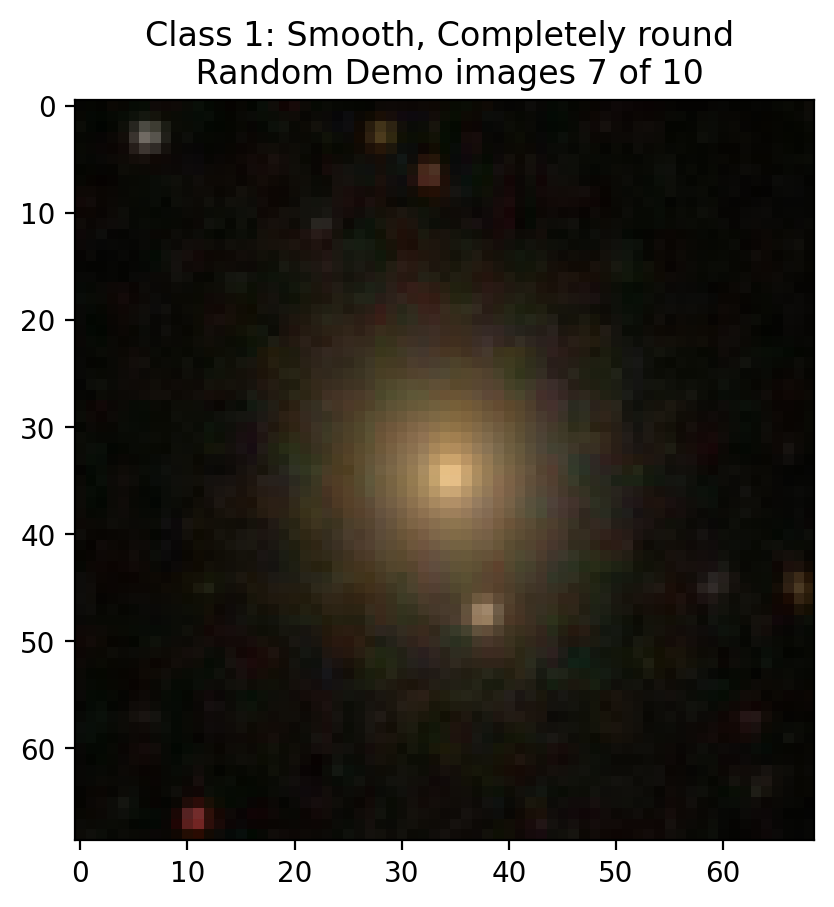

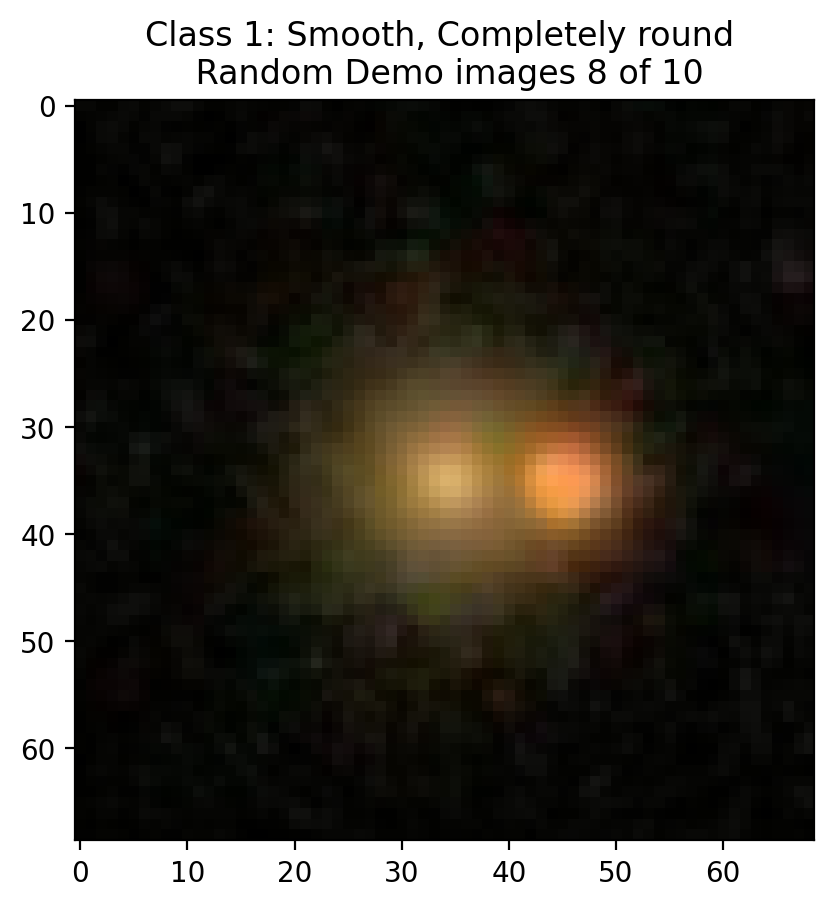

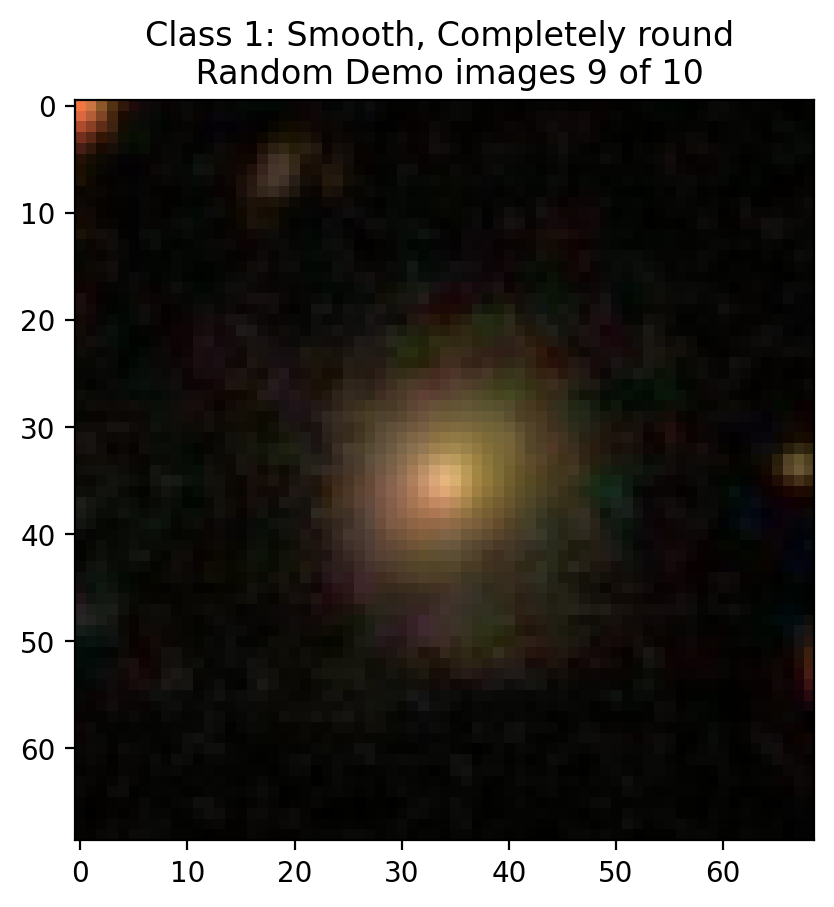

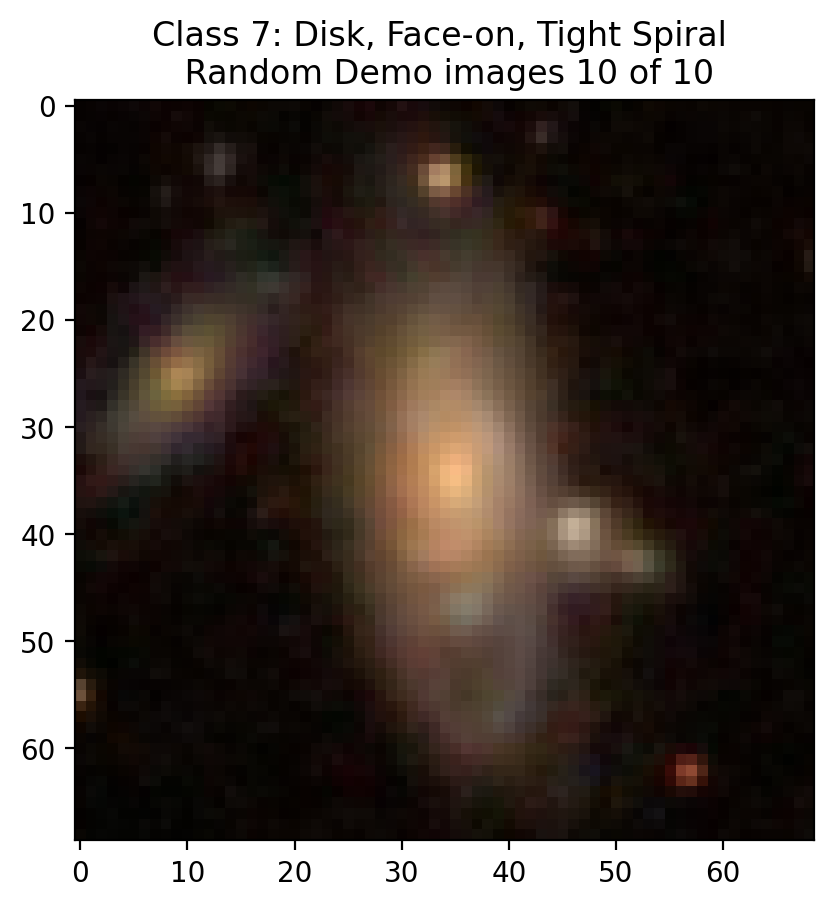

===============Data Inspection Finished===============


In [11]:
#Seleccionamos 10 imágenes para analizar y ver como se estudian
img = None
plt.ion()
print("===================Data Inspection===================")
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title(f"Class {np.argmax(labels[i])}: {galaxy10cls_lookup(labels[i])} \n Random Demo images {counter+1} of 10")
    plt.draw()
    plt.pause(2.)
plt.close("all")
print("===============Data Inspection Finished===============")

# Convertimos las etiquetas y las imagenes en números en formato que pueda ser leido
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Dividimos nuestros datos en datos de entrenamiento y en datos de prueba
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]


In [12]:
epochs = 10 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros
batch_size = 30 #batch para hacer cada entrenamiento.

#num_train = n_files #numero de imagenes en train
#num_test =  n_files_test #numero de imagenes en test

#epoch_steps = num_train // batch_size
#test_steps = num_test // batch_size

In [14]:
#Creamos el modelo de capas que nuestra red va a tener para entrenarse
model = Sequential()
model.add(Conv2D(10, (3, 3), input_shape=(69, 69,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 67, 67, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 67, 67, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 65, 65, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 65, 65, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 30, 30, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       1,152,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,189,452 (4.54 MB)

 Trainable params: 1,189,452 (4.54 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history= model.fit(train_images, train_labels,
                  #steps_per_epoch=epoch_steps,
                  epochs=epochs,
                  validation_data=(test_images, test_labels))


model.save('Entrenado2.h5')


Epoch 1/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.3594 - loss: 2.4085 - val_accuracy: 0.5177 - val_loss: 1.2096
Epoch 2/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 138s 176ms/step - accuracy: 0.5565 - loss: 1.1241 - val_accuracy: 0.6609 - val_loss: 0.9278
Epoch 3/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 144s 178ms/step - accuracy: 0.6533 - loss: 0.9150 - val_accuracy: 0.6888 - val_loss: 0.8691
Epoch 4/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 138s 173ms/step - accuracy: 0.7044 - loss: 0.7810 - val_accuracy: 0.7168 - val_loss: 0.7827
Epoch 5/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 140s 170ms/step - accuracy: 0.7490 - loss: 0.6822 - val_accuracy: 0.6824 - val_loss: 0.8925
Epoch 6/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 144s 173ms/step - accuracy: 0.7679 - loss: 0.6268 - val_accuracy: 0.7109 - val_loss: 0.8237
Epoch 7/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 106s 172ms/step - accuracy: 0.7971 - loss: 0.5440 - val_accuracy: 0.6934 - val_loss: 0.8678
Epoch 8/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 142s 172ms/step - accuracy: 0.8242 -

In [17]:

predicted_labels = model.predict(test_images)


prediction_class = np.argmax(predicted_labels, axis=1)

test_class = np.argmax(test_labels, axis=1)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
